# "Anticipez les besoins en consommation électrique de bâtiments"
_Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [1]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on colab

In [2]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
You're on Google Colab


Noticing user about files that has to be in the current working directory.

In [3]:
def file_required(file_name):
    if os.path.exists(os.getcwd()+"/"+file_name):
        print("OK, loading "+file_name+"\
                           from the current working directory ...")
    else:
        print("Please, put "+file_name+"\
                           in the current working directory")

Installations and importations required for Google Colab version.

In [4]:
# !pip freeze > requirements.txt

In [5]:
import os

if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET4':
        os.chdir('My Drive/--DATA SCIENCE/PROJET4')
    !pip install -r requirements.txt
else:
    # make sure 'P4_functions.py' is in the current working directory
    file_required('/P4_functions.py')
    file_required('requirements.txt')
    !pip install -r requirements.txt

     |████████████████████████████████| 133kB 11.0MB/s 
     |████████████████████████████████| 6.3MB 12.7MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 163kB 55.2MB/s 
     |████████████████████████████████| 3.0MB 50.7MB/s 
     |████████████████████████████████| 1.1MB 51.6MB/s 
     |████████████████████████████████| 1.3MB 58.9MB/s 
     |████████████████████████████████| 122kB 61.7MB/s 
     |████████████████████████████████| 6.9MB 41.1MB/s 
     |████████████████████████████████| 92kB 5.1MB/s 
     |████████████████████████████████| 849kB 48.0MB/s 
  Created wheel for gTTS-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=ddc93a703ccbe7213847934914a8276cf3de4d0b8c61e5a870dc5be81c55a43e
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
  Created wheel for ppscore: filename=ppscore-0.0.3-py2.py3-none-any.whl size=10303 sha256=38e70b96bae0ba3ebc15391d4b8551c8

In [6]:
from P4_functions import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


Importation of modules and packages. 

In [7]:
import io
# import re
# import simplejson as json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

import warnings
warnings.filterwarnings('ignore')

# from ipywidgets import interact, interact_manual
# import missingno as msno
# import ppscore as pps

import dill

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph

import category_encoders as ce

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.linear_model import *
from sklearn import metrics

from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge, Lasso, Lars, LinearRegression, ElasticNet, huber, ransac, theil_sen
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

Setting pandas display options

In [8]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                    'display.max_colwidth': 100,
                    'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

To play audio text-to-speech during execution.

In [9]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [10]:
plot_enabled = False
save_enabled = False

In [11]:
speak('Packages and modules successfully imported')

### 0.1 Importing the dataset

In [12]:
if is_colab==True:
    path_csv = 'DATA/Cleaned_data.csv' 
    # Importing database from my Drive
    print("2. Try to import in notebook from myDrive...")
else:
    path_csv = '../DATA/Cleaned_data.csv'
    # Importing database from a DATA directory
    print("2. Try to import in notebook from PC ('DATA')")

df = pd.read_csv(path_csv, sep=',', index_col='Unnamed: 0',
                 low_memory=True, encoding ='utf-8')

print("-----> importation of .csv in the notebook OK")

2. Try to import in notebook from myDrive...
-----> importation of .csv in the notebook OK


In [13]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'ZipCode', 'La

In [14]:
prop_Q_cols = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
               'PropertyGFAParking', 'PropertyGFABuilding(s)',
               'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
               'ThirdLargestPropertyUseTypeGFA', 'BuildingAge',
               'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified',
               'ExtsurfVolRatio']
prop_C_cols = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
               'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']
target_cols = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
                'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log']

In [15]:
speak('Dataset successfully imported')

### 0.2 Overview

Printing total nb and percentage of null

In [16]:
print_null_pct(df)

nb of null:  3833 
pct of null:  3.6


Showing columns where there are still NaN values

In [17]:
df.isna().sum(axis=0)[df.isna().sum(axis=0)!=0]

TaxParcelIdentificationNumber       1
ENERGYSTARScore                   542
Comments                         1648
Outlier                          1626
ZipCode                            16
dtype: int64

In [18]:
speak('Description overview done')

## 1 Data preprocessing

### 1.1 Target data transformation

We already found in the Cleaning_EDA notebook that the distribution of the target data could become almost normal with logarithmic transformation.

Here are the histograms of transformed values.

#### SiteEnergyUse(kBtu)

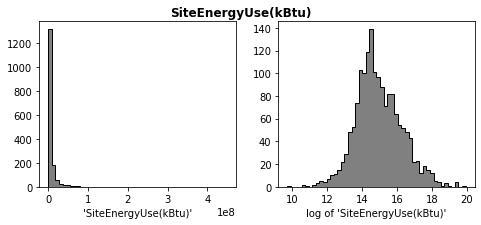

In [19]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['SiteEnergyUse(kBtu)'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'SiteEnergyUse(kBtu)'")
axs[1].hist(df['SiteEnergyUse(kBtu)_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'SiteEnergyUse(kBtu)'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('SiteEnergyUse(kBtu)', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

#### TotalGHGEmissions

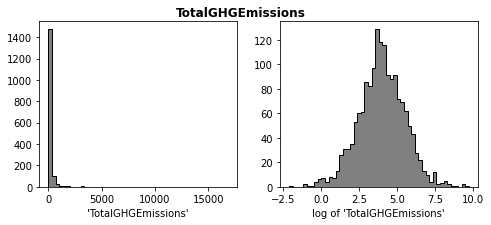

In [20]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['TotalGHGEmissions'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'TotalGHGEmissions'")
axs[1].hist(df['TotalGHGEmissions_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'TotalGHGEmissions'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('TotalGHGEmissions', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

### 1.2 First features selection

#### Quantitative data

Excluding highly correlated quantitative features.
- 'PropertyGFATotal' is strongly correlated with 'PropertyGFABuilding(s)'
- 'PropertyGFABuilding(s)' is strongly correlated with 'LargestPropertyUseTypeGFA'
- 'ExtsurfVolRatio' is strongly correlated with 'NumberofBuildings'

In [21]:
prop_Q_cols_sel = [c for c in prop_Q_cols if c not in\
                              ['PropertyGFATotal',
                               'PropertyGFABuilding(s)',
                               'ExtsurfVolRatio']]
prop_Q_cols_sel

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'BuildingAge',
 'MeanGFAperFloor',
 'ParkingGFARatio',
 'NbYearsCertified']

#### Categorical data

Excluding highly related categorical features.
- 'LargestPropertyUseType'(57) is strongly correlated with 'PrimaryPropertyType'(29)

In [22]:
prop_C_cols_sel = [c for c in prop_C_cols if c not in ['PrimaryPropertyType']]
prop_C_cols_sel

['BuildingType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'CertifiedPreviousYear',
 'EnergyProfile',
 'MainEnergy']

### 1.3 Splitting training and testing set 

In [23]:
df_X = df[prop_Q_cols+prop_C_cols]
df_y1 = df['SiteEnergyUse(kBtu)']
df_y2 = df['TotalGHGEmissions']

Since 'PrimaryProperty_Type' seems to be the categorical value the most related (seem ppscores in §2.2 of the Cleaning_EDA notebook) to our target features, we split the data with stratification using this column.

In [24]:
X_tr, X_te, y1_tr, y1_te = train_test_split(df_X, df_y1,
                                            train_size=0.8, shuffle=True,
                                            stratify=df['PrimaryPropertyType'])

In [25]:
y1_log_tr, y1_log_te  = np.log(y1_tr), np.log(y1_te)

Training and testing set for linear regression (avoiding colinearity)

In [26]:
X_tr_sel = X_tr[prop_Q_cols_sel+prop_C_cols_sel]
X_te_sel = X_te[prop_Q_cols_sel+prop_C_cols_sel]

In [27]:
print("Columns missing in prop_Q_cols_sel and prop_C_cols_sel:\n" ,
      set(X_tr.columns) - set(X_tr_sel.columns))

Columns missing in prop_Q_cols_sel and prop_C_cols_sel:
 {'ExtsurfVolRatio', 'PropertyGFABuilding(s)', 'PropertyGFATotal', 'PrimaryPropertyType'}


### 1.4 Feature transformations

__Quantitative data__

Standardizing the quantitative values.

__Categorical data__

Categorical data are all nominal data, none of them are ordinal. We'll choose between:
- Ordinal Encoding (boolean): 'CertifiedPreviousYear'(2)
- One-Hot Encoding (low cardinality):
'BuildingType'(5), 'MainEnergy'(3), 'EnergyProfile'(8)
- Binary or Hashing or Leave-One-Out target encoding (high cardinality):
('LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType', 'PrimaryPropertyType')

In [28]:
# full dataset
column_trans = make_column_transformer(
    (ce.OneHotEncoder(drop_invariant=True), ['BuildingType', 'MainEnergy','EnergyProfile']),
    (ce.OrdinalEncoder(drop_invariant=True), ['CertifiedPreviousYear']),
    (ce.HashingEncoder(n_components=8, drop_invariant=True),
     ['LargestPropertyUseType', 'SecondLargestPropertyUseType',
      'ThirdLargestPropertyUseType', 'PrimaryPropertyType']),
     remainder=StandardScaler())

# dataset to avoid colinearity
column_trans_sel = make_column_transformer(
    (ce.OneHotEncoder(drop_invariant=True), ['BuildingType', 'MainEnergy','EnergyProfile']),
    (ce.OrdinalEncoder(drop_invariant=True), ['CertifiedPreviousYear']),
    (ce.HashingEncoder(n_components=8, drop_invariant=True),
     ['LargestPropertyUseType', 'SecondLargestPropertyUseType',
      'ThirdLargestPropertyUseType']),
     remainder=StandardScaler())

## 2 First model selection

In [29]:
df_res = pd.DataFrame(dtype = 'object')

### 2.0 Knn Regressor baseline

Training a Knn regressor on the training set and optimizing nb of neighbors with cross-validation grid search. Putting the results in a dataframe for further comparison with other models.

In [30]:
reg = KNeighborsRegressor()
name_reg = 'KNN'
dict_param_grid = {'KNN': {'n_neighbors': [1,2,3,5,7,9,13,17,21]}}
kf_gscv = KFold(n_splits=5, shuffle=True)

# version unique
knn_gscv, new_df_res = model_optimizer(name_reg=name_reg, data_preproc=column_trans,
                                 reg=reg, param_grid=dict_param_grid[name_reg],
                                 Xtr=X_tr, ytr=y1_tr, Xte=X_te, yte=y1_te,
                                 cv_gs=kf_gscv, cv_test=6)
df_res = pd.concat([df_res, new_df_res], axis=1)

df_res

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   46.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s finished


,KNN
name_params,['n_neighbors']
best_params,[3]
RMSE,17734939.71
R2,0.26
Adj_R2,0.21
mean_CV_te_RMSE,15782338.51
mean_CV_te_R2,0.15
mean_CV_te_adjR2,-0.25


Plotting the score of knn vs number of k_neighbors on the training set

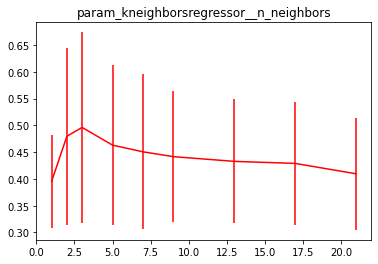

In [42]:
plot_1D_hyperparam_opt(knn_gscv)

Plotting the learning curve of knn

Using matplotlib backend: agg


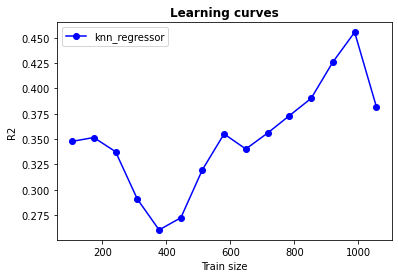

In [70]:
model = knn_gscv.best_estimator_
label = "knn_regressor"
%matplotlib
fig = plot_learning_curve(model, X_tr, y1_tr,
                          train_sizes=np.linspace(0.1,1,15),
                          scoring="r2", label="knn_regressor",
                          c='b') # , fig = fig
%matplotlib inline
fig

### 2.1 Linear regression - without regularization

In [51]:
df_lr = pd.DataFrame(dtype = 'object')

#### 'SiteEnergyUse(kBtu)' target

With all the features

In [52]:
reg = LinearRegression()
name_reg = 'LinReg(all)'

pipe = make_pipeline(column_trans, reg)
pipe.fit(X_tr,y1_tr)

df_lr = get_append_scores(name_reg, pipe, X_te, y1_te, df_lr, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished


With selection of the features, trying to avoid colinearity

In [53]:
reg = LinearRegression()
name_reg = 'LinReg(sel)'

pipe = make_pipeline(column_trans_sel, reg)
pipe.fit(X_tr_sel,y1_tr)

df_lr = get_append_scores(name_reg, pipe, X_te_sel, y1_te, df_lr, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished


#### 'SiteEnergyUse(kBtu)_log' target

In [54]:
reg = LinearRegression()
name_reg = 'LinReg_log(all)'

pipe = make_pipeline(column_trans, reg)
pipe.fit(X_tr,y1_log_tr)

y_pr = pipe.predict(X_te)

df_lr = get_append_scores(name_reg, pipe, X_te, y1_log_te, df_lr, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished


Show all the results

In [55]:
df_lr

,LinReg(all),LinReg(sel),LinReg_log(all)
RMSE,18202214.89,18277565.85,0.98
R2,0.22,0.21,0.32
Adj_R2,0.16,0.17,0.28
mean_CV_te_RMSE,34575912.44,24942603.37,1.39
mean_CV_te_R2,-6.14,-1.90,-0.56
mean_CV_te_adjR2,-9.53,-2.92,-1.31


### 2.2 Linear Regularized Regressions

In [37]:
'''MODELES REGRESSEURS LINEAIRES DANS SKLEARN : 
Lars, LassoLars, ARDRegression, BayesianRidge, SGDRegressor, HuberRegressor,
RANSACRegressor, TheilSenRegressor, TweedieRegressor, GammaRegressor,
PoissonRegressor, PassiveAggressiveRegressor'''

from sklearn.linear_model import *

In [ ]:
# sans optimisation

df_non_opt = pd.DataFrame(dtype = 'object')

for name_reg, reg in zip(['Ridge', 'Lasso', 'ElasticNet', 'Lars', 'LassoLars',
                          'ARDRegression', 'BayesianRidge', 'SGDRegressor',
                          'HuberRegressor', 'RANSACRegressor', 'TheilSenRegressor',
                          'PassiveAggressiveRegressor',
                          'PoissonRegressor', 'TweedieRegressor', 'GammaRegressor'],
                         [Ridge(), Lasso(), ElasticNet(), Lars(), LassoLars(),
                          ARDRegression(), BayesianRidge(), SGDRegressor(),
                          HuberRegressor(), RANSACRegressor(), TheilSenRegressor(),
                          PassiveAggressiveRegressor(),
                          PoissonRegressor(), TweedieRegressor(), GammaRegressor()]):

    pipe = make_pipeline(column_trans, reg)
    pipe.fit(X_tr,y1_tr)

    df_non_opt = get_append_scores(name_reg, pipe, X_te, y1_te, df_non_opt, cv=6)

In [73]:
df_non_opt

,Ridge,Lasso,ElasticNet,Lars,LassoLars,ARDRegression,BayesianRidge,SGDRegressor,HuberRegressor,RANSACRegressor,TheilSenRegressor,PassiveAggressiveRegressor,PoissonRegressor,TweedieRegressor,GammaRegressor
RMSE,18164903.20,18197833.89,17093730.54,18197841.58,18197759.79,20577042.79,20577042.79,18365318.47,16854562.86,6371425023877938176.00,16611663.08,20076492.07,338759569.93,16822723.54,2179276236.11
R2,0.22,0.22,0.31,0.22,0.22,-0.00,-0.00,0.20,0.33,-95980631511579553169408.00,0.35,0.05,-270.33,0.33,-11227.84
Adj_R2,0.17,0.16,0.26,0.16,0.16,-0.07,-0.07,0.15,0.28,-102503587051201456242688.00,0.30,-0.02,-288.77,0.29,-11990.97
mean_CV_te_RMSE,31926399.43,34325530.78,17181233.05,40902118.16,34325122.08,17799209.41,17799209.41,24487186.61,14252888.34,15933566.96,15326854.01,18632655.93,43468308710988.42,15345722.09,2381594141.41
mean_CV_te_R2,-5.18,-5.97,-0.04,-6.29,-5.97,-0.05,-0.05,-2.06,0.40,0.05,0.28,-0.18,-39157765990696.26,0.28,-116218.02
mean_CV_te_adjR2,-8.11,-9.28,-0.53,-9.76,-9.28,-0.54,-0.54,-3.52,0.12,-0.41,-0.06,-0.75,-57762134447814.86,-0.06,-171435.20


In [74]:
# optimisation de quelques-uns

kf = KFold(n_splits=5, shuffle=True)
dict_param_grid = {'my_Ridge': {'alpha': np.logspace(2,4,50)},
                   'my_Lasso': {'alpha': np.logspace(5,7,50)},
                   'my_ElasticNet': {'alpha': np.logspace(5,7,50),
                                     'l1_ratio': [0.15,0.3,0.45,0.6,0.75]}}
li_models = [Ridge(), Lasso(), ElasticNet()]
li_name_models = ['my_Ridge', 'my_Lasso', 'my_ElasticNet']
kf_gscv = KFold(n_splits=2, shuffle=True)

dict_gscv = {}
for reg, name_reg in zip(li_models, li_name_models):
    param_grid = dict_param_grid[name_reg]
    gscv, new_df_res = model_optimizer(name_reg=name_reg,
                                       data_preproc=column_trans,
                                       reg=reg,
                                       param_grid=param_grid,
                                       Xtr=X_tr, ytr=y1_tr, Xte=X_te, yte=y1_te,
                                       cv_gs=kf_gscv, cv_test=6)
    df_res = pd.concat([df_res, new_df_res], axis=1)
    dict_gscv[name_reg] = gscv

df_res

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 250 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.2s finished


,KNN,my_Ridge,my_Lasso,my_ElasticNet
name_params,['n_neighbors'],['alpha'],['alpha'],"['alpha', 'l1_ratio']"
best_params,[3],[100.0],[100000.0],"[100000.0, 0.75]"
RMSE,17734939.71,17754211.30,18106834.54,20575118.28
R2,0.26,0.25,0.22,-0.00
Adj_R2,0.21,0.20,0.17,-0.07
mean_CV_te_RMSE,15782338.51,16903677.75,27944068.90,17403735.17
mean_CV_te_R2,0.15,-0.08,-3.50,-0.05
mean_CV_te_adjR2,-0.25,-0.59,-5.64,-0.56


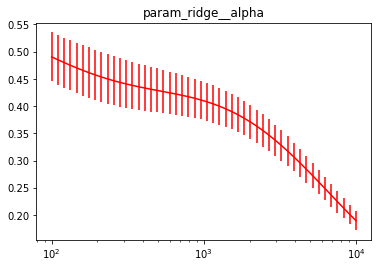

In [75]:
plot_1D_hyperparam_opt(dict_gscv['my_Ridge'], log_sc=True)

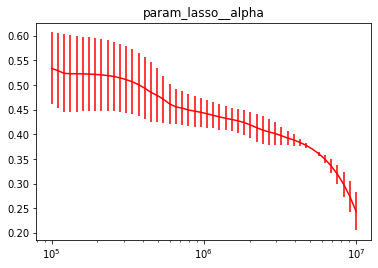

In [76]:
plot_1D_hyperparam_opt(dict_gscv['my_Lasso'], log_sc=True)

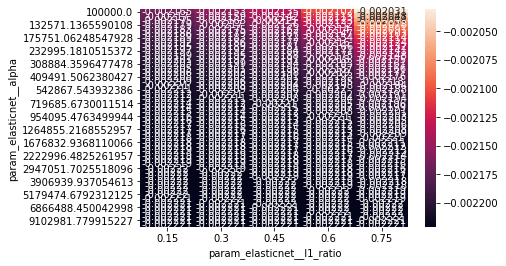

In [77]:
plot_2D_hyperparam_opt(dict_gscv['my_ElasticNet'])

In [78]:
import dill
file = open(os.getcwd()+'/P4_dict_gscv.pkl', 'wb')
dill.dump(dict_gscv, file)

In [ ]:
file = open(os.getcwd()+'/P4_dict_gscv.pkl', 'rb')
dict_gscv = dill.load(file)